## Final Project
### Name: Behnam Sobhani Nadri
### Student ID: 801368949

https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection

Code Example: https://www.kaggle.com/code/ahmedbasem/99-6-accuracy-network-intrusion-detection

## Questions

### Does different random state helps?
### Does it important to compare models or tuning the hyperparameters?
### Does it matter what preprocessing to use?
### Does it matter to do Regularization? or PCA?

### compare against models Changing the parameters to have the best model

## All libraries that we use in the lab is defined here

In [150]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sb
from google.colab import drive
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn import metrics

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
file_path='/content/drive/My Drive/Courses/Intro to ML/Project/network_data.csv'
df_network = pd.read_csv(file_path)

file_path='/content/drive/My Drive/Courses/Intro to ML/Project/Test_data.csv'
df_network_test = pd.read_csv(file_path)


df_network_1 = pd.DataFrame((df_network.iloc[:,1] == "tcp").replace(True,1).replace(False,0)).rename(columns={'protocol_type':'tcp_protocol'})
df_network = pd.concat([df_network, df_network_1], axis = 1)
df_network_2 = pd.DataFrame((df_network.iloc[:,1] == "udp").replace(True,1).replace(False,0)).rename(columns={'protocol_type':'udp_protocol'})
df_network = pd.concat([df_network, df_network_2], axis = 1)
df_network_3 = pd.DataFrame((df_network.iloc[:,1] == "icmp").replace(True,1).replace(False,0)).rename(columns={'protocol_type':'icmp_protocol'})
df_network = pd.concat([df_network, df_network_3], axis = 1)
df_network_4 = pd.DataFrame((df_network.iloc[:,41] == "anomaly").replace(True,1).replace(False,0)).rename(columns={'class':'class_t'})
df_network = pd.concat([df_network, df_network_4], axis = 1)
df_network = df_network.drop(['service','flag','protocol_type','class'],axis=1) # Not sure to keep the protocol or not
# Choose the features based on
df_network.head(20)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,tcp_protocol,udp_protocol,icmp_protocol,class_t
0,0,491,0,0,0,0,0,0,0,0,...,0.17,0.00,0.00,0.00,0.05,0.00,1,0,0,0
1,0,146,0,0,0,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,1,0,0,1
3,0,232,8153,0,0,0,0,0,1,0,...,0.03,0.04,0.03,0.01,0.00,0.01,1,0,0,0
4,0,199,420,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,1,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,1,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,1,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,1,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,1,0,0,1


In [152]:
df_network.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,tcp_protocol,udp_protocol,icmp_protocol,class_t
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769,0.814782,0.119522,0.065695,0.466140
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333,0.388482,0.324408,0.247754,0.498862
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Correlation

In [153]:
X = df_network.iloc[:,1:41].values
Y = df_network.iloc[:,41].values

### Logistic Regression Classifier

In [154]:
# K=40
# accur = np.zeros((K,2))
# prec = np.zeros((K,2))
# rec = np.zeros((K,2))
# f1 = np.zeros((K,2))

# for i in range(K):
#     # X = df_cancer.iloc[:,1:31].values
#     # Y = df_cancer.iloc[:,31].values
#     # print(i)
#     decomposer = PCA(n_components=i+1)
#     X_r = decomposer.fit(X).transform(X)
#     X_train_r, X_test_r, Y_train, Y_test = train_test_split(X_r,Y, test_size=0.25, random_state = 2)
#     sc_X = StandardScaler()
#     X_train_r = sc_X.fit_transform(X_train_r)
#     X_test_r = sc_X.transform(X_test_r)
#     # classifier = svm.SVC()
#     classifier = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
#     classifier.fit(X_train_r, Y_train)
#     Y_pred = classifier.predict(X_test_r)
#     accur [ i, 0]=i+1
#     accur [i,1] = metrics.accuracy_score(Y_test, Y_pred)
#     prec [ i, 0]=i+1
#     prec [i,1] = metrics.precision_score(Y_test, Y_pred)
#     rec [ i, 0]=i+1
#     rec [i,1] = metrics.recall_score(Y_test, Y_pred)
#     f1 [ i, 0]=i+1
#     f1 [i,1] = metrics.f1_score(Y_test, Y_pred)

# maximum_accur = max(accur[:,1])
# print("Maximum Accuracy is:", maximum_accur)
# print("Maximum Accuracy is at K:", accur[accur[:,1] == maximum_accur][0,0])


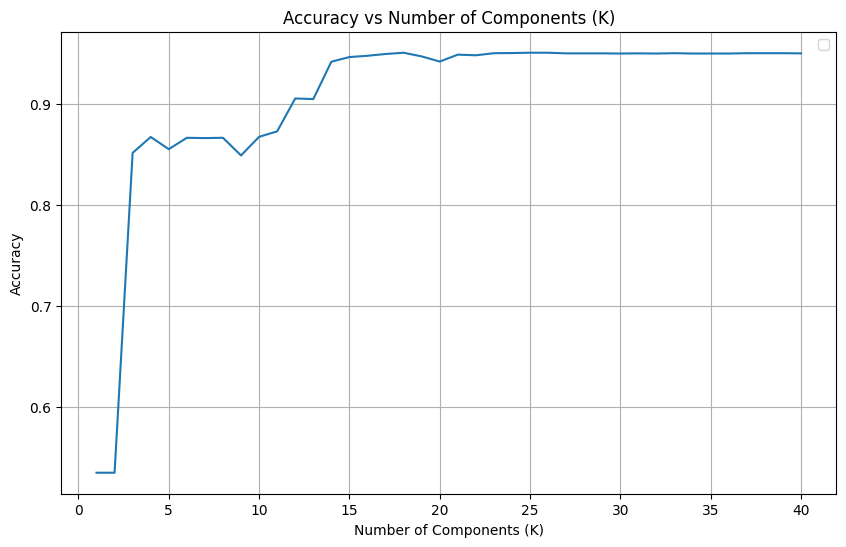

In [ ]:
plt.plot(accur[:,0],accur[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Components (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Components (K)')
plt.legend()

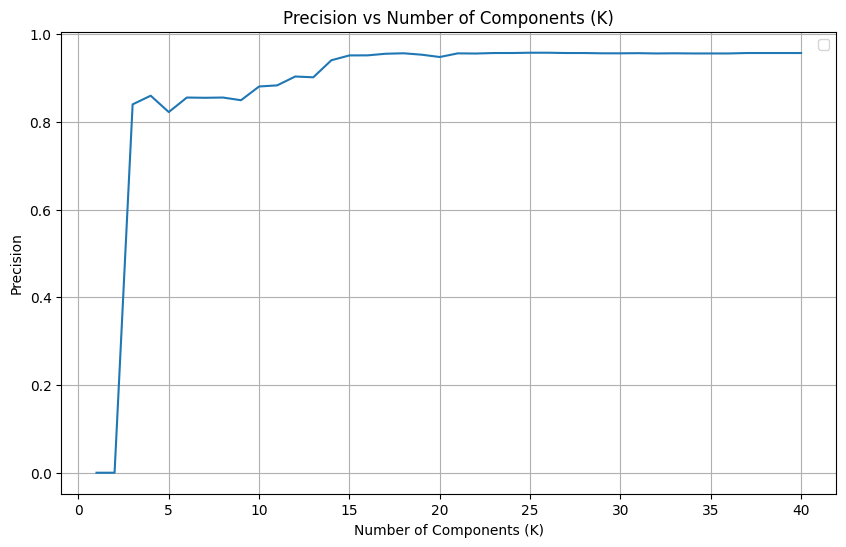

In [ ]:
plt.plot(prec[:,0],prec[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Components (K)')
plt.ylabel('Precision')
plt.title('Precision vs Number of Components (K)')
plt.legend()

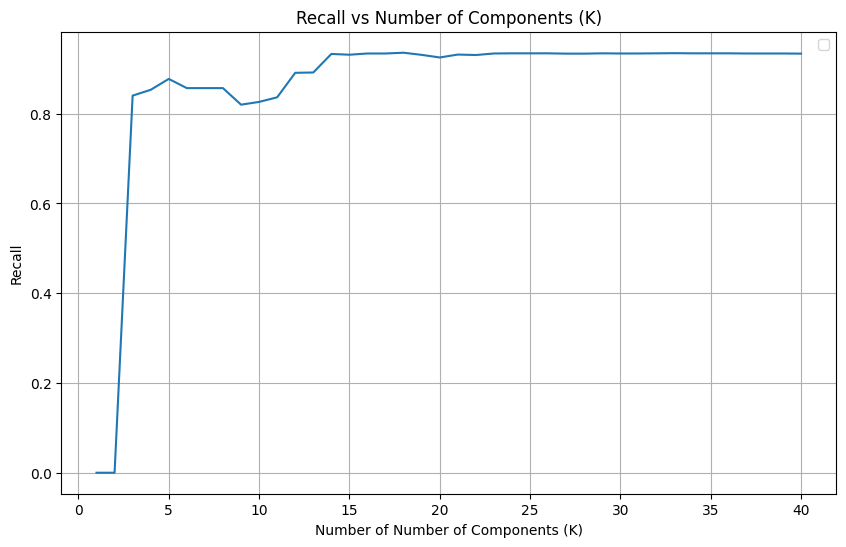

In [ ]:
plt.plot(rec[:,0],rec[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Number of Components (K)')
plt.ylabel('Recall')
plt.title('Recall vs Number of Components (K)')
plt.legend()

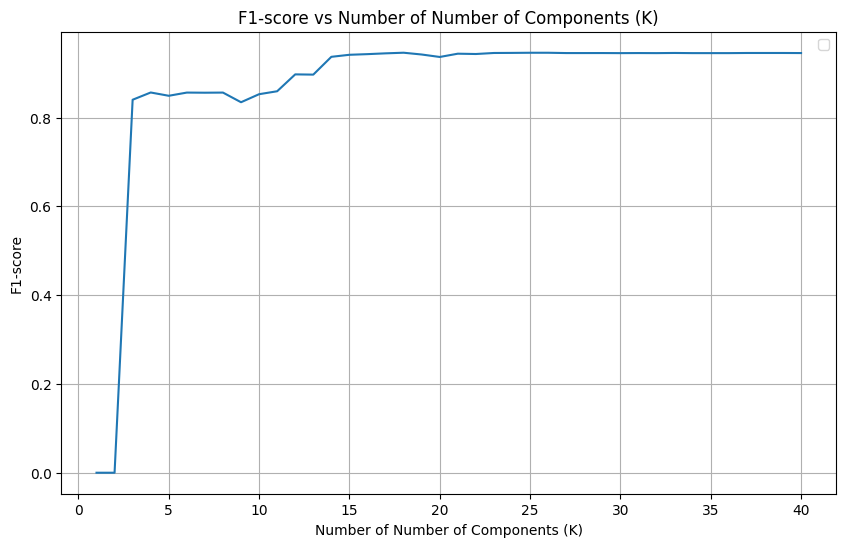

In [ ]:
plt.plot(f1[:,0],f1[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Number of Components (K)')
plt.ylabel('F1-score')
plt.title('F1-score vs Number of Number of Components (K)')
plt.legend()

In [155]:
K=18

decomposer = PCA(n_components=K)
X_r = decomposer.fit(X).transform(X)
X_train_r, X_test_r, Y_train, Y_test = train_test_split(X_r,Y, test_size=0.25, random_state = 2)
sc_X = StandardScaler()
X_train_r = sc_X.fit_transform(X_train_r)
X_test_r = sc_X.transform(X_test_r)
classifier = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
classifier.fit(X_train_r, Y_train)
Y_pred = classifier.predict(X_test_r)

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test,Y_pred))
print("Recall:", metrics.recall_score(Y_test,Y_pred))
print("F1-score:", metrics.f1_score(Y_test,Y_pred))

Accuracy: 0.9504604636392505
Precision: 0.9567190226876091
Recall: 0.9358142710822807
F1-score: 0.9461511908871246


Confusion matrix, without normalization
[[3245  124]
 [ 188 2741]]
Normalized confusion matrix
[[0.96319383 0.03680617]
 [0.06418573 0.93581427]]


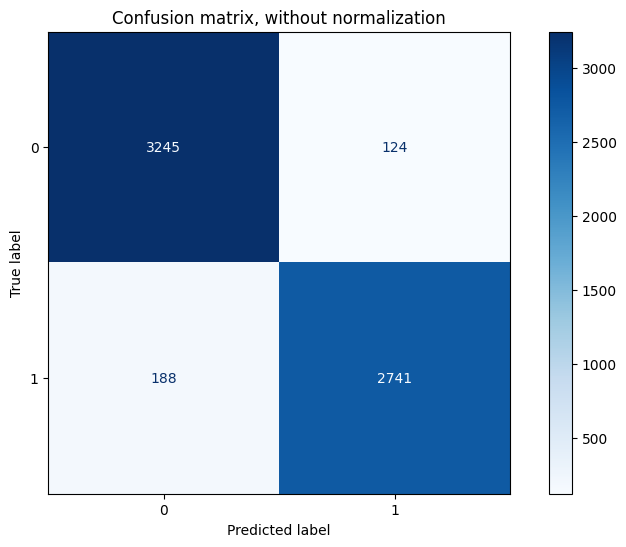

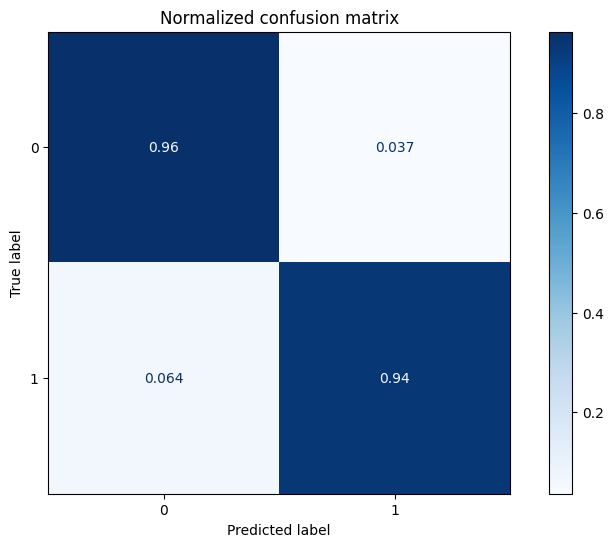

In [156]:
titles_options = [
        ("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", "true"),
    ]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test_r,
    Y_test,
    display_labels=classifier.classes_,
    cmap=plt.cm.Blues,
    normalize=normalize
  )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

    # plt.savefig(f'fig/conf_matrix_{classifier}')

Confusion matrix, without normalization
[[3250  119]
 [ 192 2737]]
Normalized confusion matrix
[[0.96467795 0.03532205]
 [0.06555138 0.93444862]]


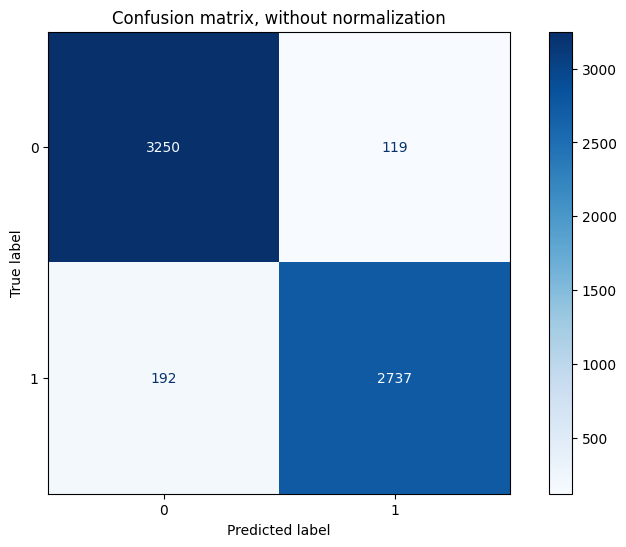

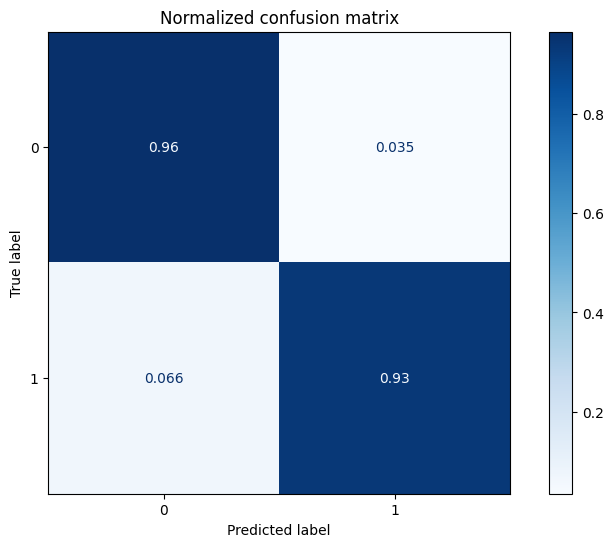

In [168]:
titles_options = [
        ("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", "true"),
    ]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test_r,
    Y_test,
    display_labels=classifier.classes_,
    cmap=plt.cm.Blues,
    normalize=normalize
  )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

In [167]:
X_train_r, X_test_r, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state = 2)
sc_X = StandardScaler()
X_train_r = sc_X.fit_transform(X_train_r)
X_test_r = sc_X.transform(X_test_r)
classifier = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
classifier.fit(X_train_r, Y_train)
Y_pred = classifier.predict(X_test_r)

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test,Y_pred))
print("Recall:", metrics.recall_score(Y_test,Y_pred))
print("F1-score:", metrics.f1_score(Y_test,Y_pred))

Accuracy: 0.9506192442045094
Precision: 0.9583333333333334
Recall: 0.9344486172755206
F1-score: 0.9462402765773551


### Support Vector Machine (SVM) Classifier

In [ ]:
# K=40
# # kern='sigmoid'
# # kern='poly'
# kern='linear'
# accur = np.zeros((K,2))
# prec = np.zeros((K,2))
# rec = np.zeros((K,2))
# f1 = np.zeros((K,2))

# for i in range(K):

#     decomposer = PCA(n_components=i+1)
#     X_r = decomposer.fit(X).transform(X)
#     X_train_r, X_test_r, Y_train, Y_test = train_test_split(X_r,Y, test_size=0.25, random_state = 2)
#     sc_X = StandardScaler()
#     X_train_r = sc_X.fit_transform(X_train_r)
#     X_test_r = sc_X.transform(X_test_r)
#     classifier = svm.SVC(kernel=kern)
#     # classifier = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
#     classifier.fit(X_train_r, Y_train)
#     Y_pred = classifier.predict(X_test_r)
#     accur [ i, 0]=i+1
#     accur [i,1] = metrics.accuracy_score(Y_test, Y_pred)
#     prec [ i, 0]=i+1
#     prec [i,1] = metrics.precision_score(Y_test, Y_pred)
#     rec [ i, 0]=i+1
#     rec [i,1] = metrics.recall_score(Y_test, Y_pred)
#     f1 [ i, 0]=i+1
#     f1 [i,1] = metrics.f1_score(Y_test, Y_pred)

# maximum_accur = max(accur[:,1])
# print("Maximum Accuracy is:", maximum_accur)
# print("Maximum Accuracy is at K:", accur[accur[:,1] == maximum_accur][0,0])


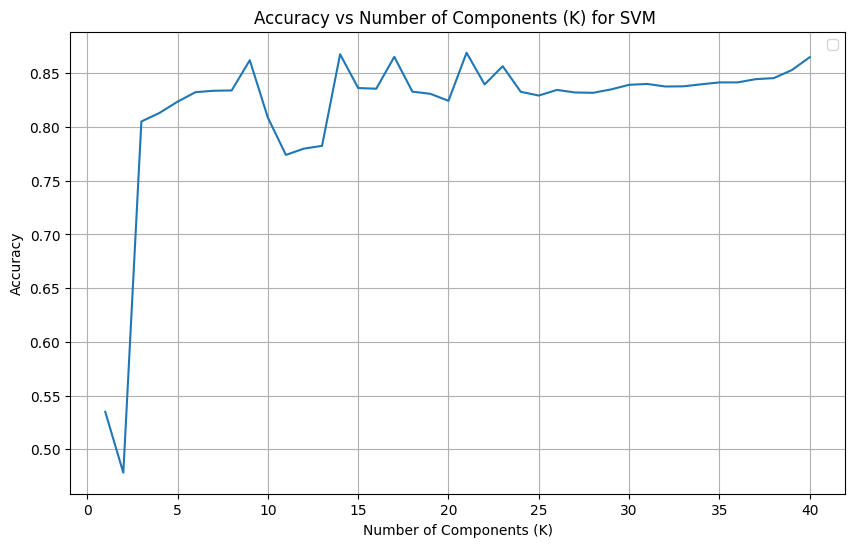

In [ ]:
plt.plot(accur[:,0],accur[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Components (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Components (K) for SVM ')
plt.legend()

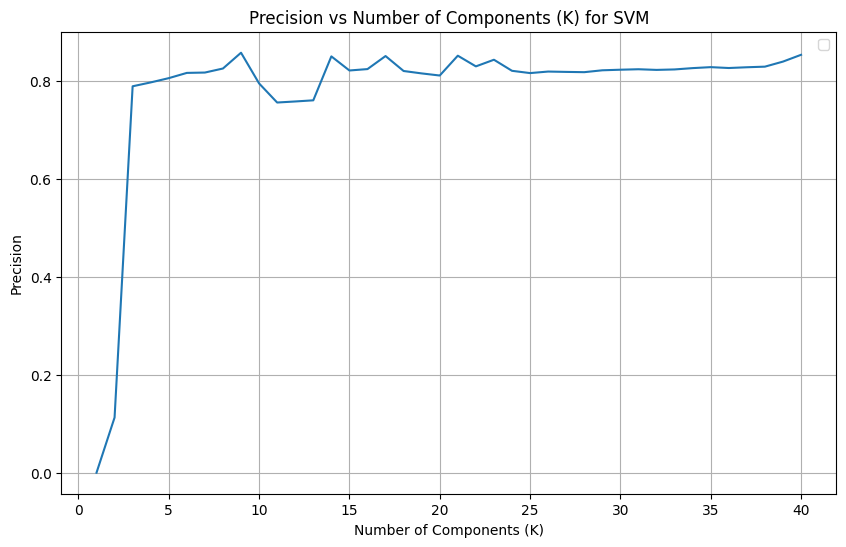

In [ ]:
plt.plot(prec[:,0],prec[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Components (K)')
plt.ylabel('Precision')
plt.title('Precision vs Number of Components (K) for SVM')
plt.legend()

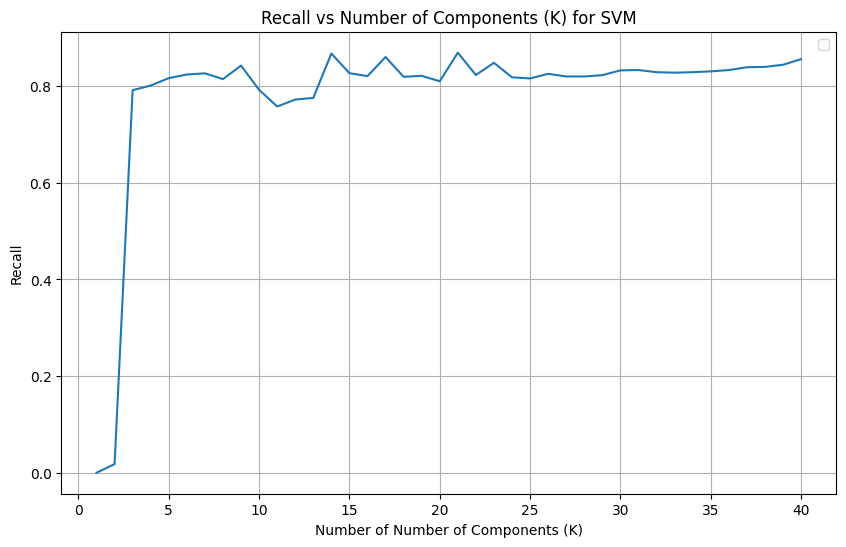

In [ ]:
plt.plot(rec[:,0],rec[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Number of Components (K)')
plt.ylabel('Recall')
plt.title('Recall vs Number of Components (K) for SVM')
plt.legend()

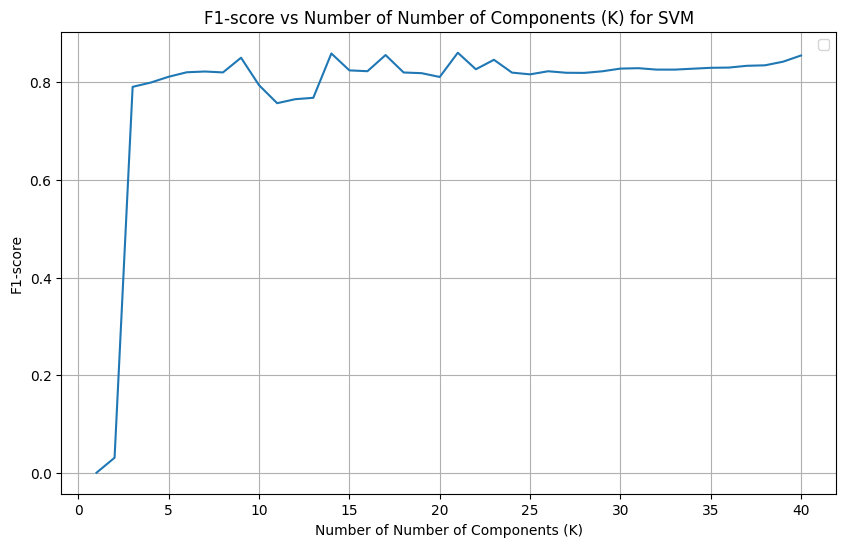

In [ ]:
plt.plot(f1[:,0],f1[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Number of Components (K)')
plt.ylabel('F1-score')
plt.title('F1-score vs Number of Number of Components (K) for SVM')
plt.legend()

In [171]:
K=21
kern='sigmoid'
# kern='poly'
# kern='linear'
# kern='precomputed'

decomposer = PCA(n_components=K)
X_r = decomposer.fit(X).transform(X)
X_train_r, X_test_r, Y_train, Y_test = train_test_split(X_r,Y, test_size=0.25, random_state = 0)
sc_X = StandardScaler()
X_train_r = sc_X.fit_transform(X_train_r)
X_test_r = sc_X.transform(X_test_r)
classifier = svm.SVC(kernel=kern)
classifier.fit(X_train_r, Y_train)
Y_pred = classifier.predict(X_test_r)

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test,Y_pred))
print("Recall:", metrics.recall_score(Y_test,Y_pred))
print("F1-score:", metrics.f1_score(Y_test,Y_pred))

Accuracy: 0.8644013972689742
Precision: 0.8506648482782134
Recall: 0.8570937822054276
F1-score: 0.8538672142368242


Confusion matrix, without normalization
[[2949  438]
 [ 416 2495]]
Normalized confusion matrix
[[0.87068202 0.12931798]
 [0.14290622 0.85709378]]


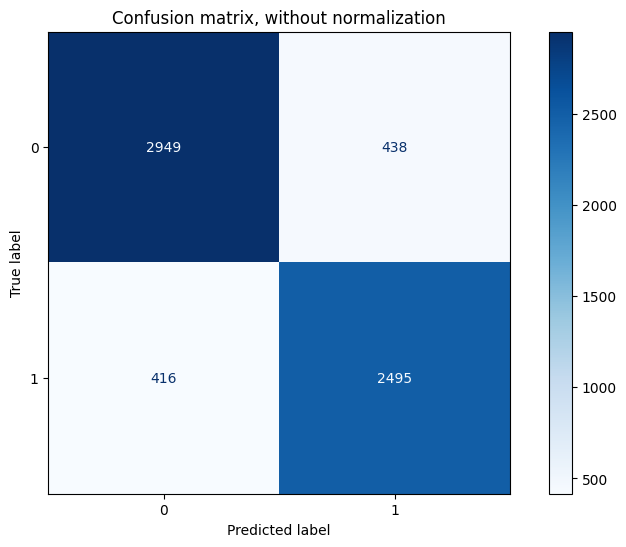

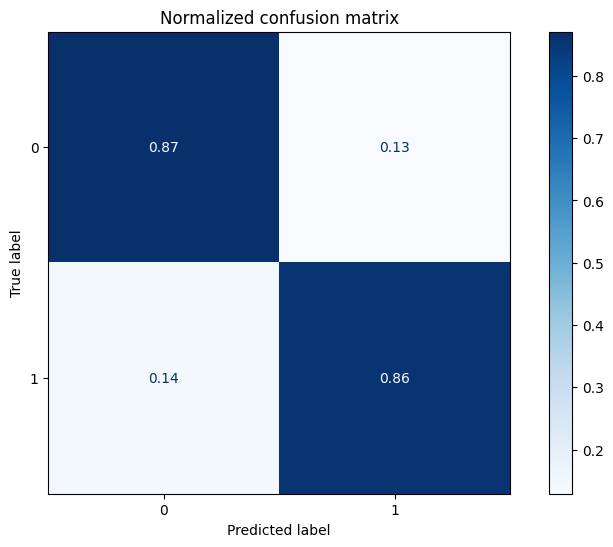

In [172]:
titles_options = [
        ("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", "true"),
    ]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test_r,
    Y_test,
    display_labels=classifier.classes_,
    cmap=plt.cm.Blues,
    normalize=normalize
  )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

### SVM without PCA

In [169]:
kern='sigmoid'
# kern='poly'
# kern='linear'

X_train_r, X_test_r, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state = 2)
sc_X = StandardScaler()
X_train_r = sc_X.fit_transform(X_train_r)
X_test_r = sc_X.transform(X_test_r)
classifier = svm.SVC(kernel=kern)
classifier.fit(X_train_r, Y_train)
Y_pred = classifier.predict(X_test_r)

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test,Y_pred))
print("Recall:", metrics.recall_score(Y_test,Y_pred))
print("F1-score:", metrics.f1_score(Y_test,Y_pred))

Accuracy: 0.9034614163226421
Precision: 0.8929901794784965
Recall: 0.900307272106521
F1-score: 0.8966337980278817


Confusion matrix, without normalization
[[3053  316]
 [ 292 2637]]
Normalized confusion matrix
[[0.90620362 0.09379638]
 [0.09969273 0.90030727]]


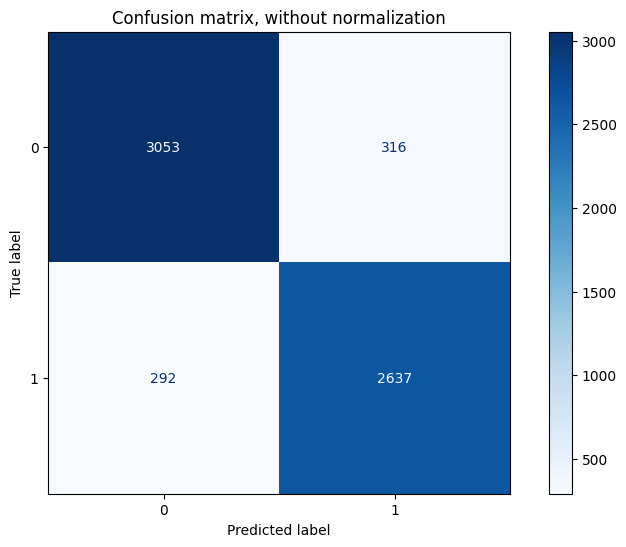

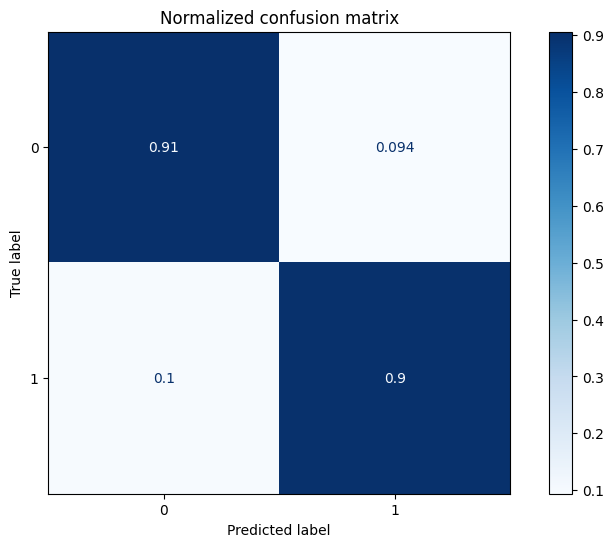

In [170]:
titles_options = [
        ("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", "true"),
    ]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test_r,
    Y_test,
    display_labels=classifier.classes_,
    cmap=plt.cm.Blues,
    normalize=normalize
  )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

### Naive Bayes (NB) Classifier

In [173]:
K=40

accur = np.zeros((K,2))
prec = np.zeros((K,2))
rec = np.zeros((K,2))
f1 = np.zeros((K,2))

for i in range(K):

    decomposer = PCA(n_components=i+1)
    X_r = decomposer.fit(X).transform(X)
    X_train_r, X_test_r, Y_train, Y_test = train_test_split(X_r,Y, test_size=0.25, random_state = 2)
    sc_X = StandardScaler()
    X_train_r = sc_X.fit_transform(X_train_r)
    X_test_r = sc_X.transform(X_test_r)
    classifier = GaussianNB()
    classifier.fit(X_train_r, Y_train)
    Y_pred = classifier.predict(X_test_r)
    accur [ i, 0]=i+1
    accur [i,1] = metrics.accuracy_score(Y_test, Y_pred)
    prec [ i, 0]=i+1
    prec [i,1] = metrics.precision_score(Y_test, Y_pred)
    rec [ i, 0]=i+1
    rec [i,1] = metrics.recall_score(Y_test, Y_pred)
    f1 [ i, 0]=i+1
    f1 [i,1] = metrics.f1_score(Y_test, Y_pred)

maximum_accur = max(accur[:,1])
print("Maximum Accuracy is:", maximum_accur)
print("Maximum Accuracy is at K:", accur[accur[:,1] == maximum_accur][0,0])


Maximum Accuracy is: 0.9212448396316291
Maximum Accuracy is at K: 21.0


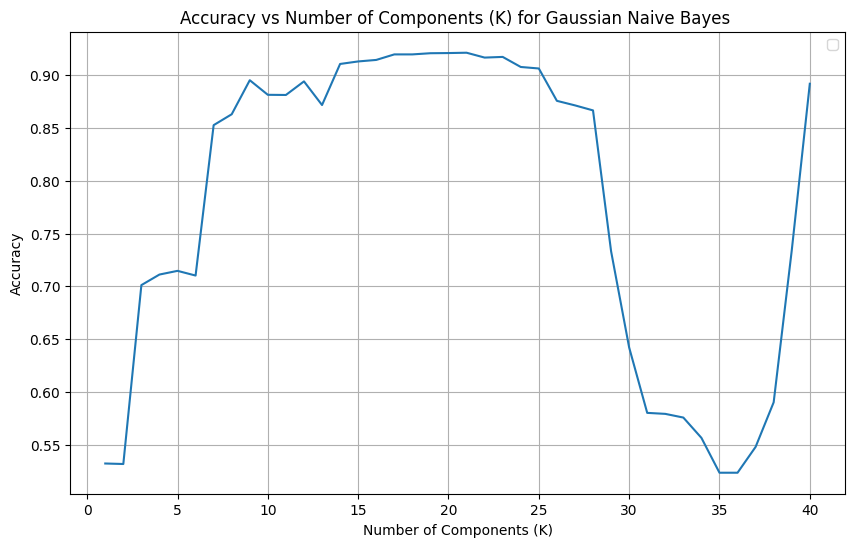

In [177]:
plt.plot(accur[:,0],accur[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Components (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Components (K) for Gaussian Naive Bayes ')
plt.legend()

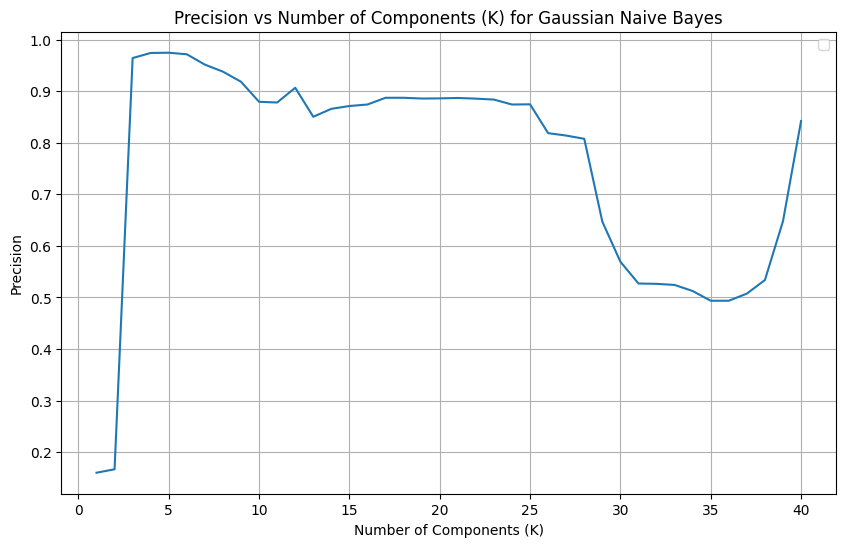

In [178]:
plt.plot(prec[:,0],prec[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Components (K)')
plt.ylabel('Precision')
plt.title('Precision vs Number of Components (K) for Gaussian Naive Bayes')
plt.legend()

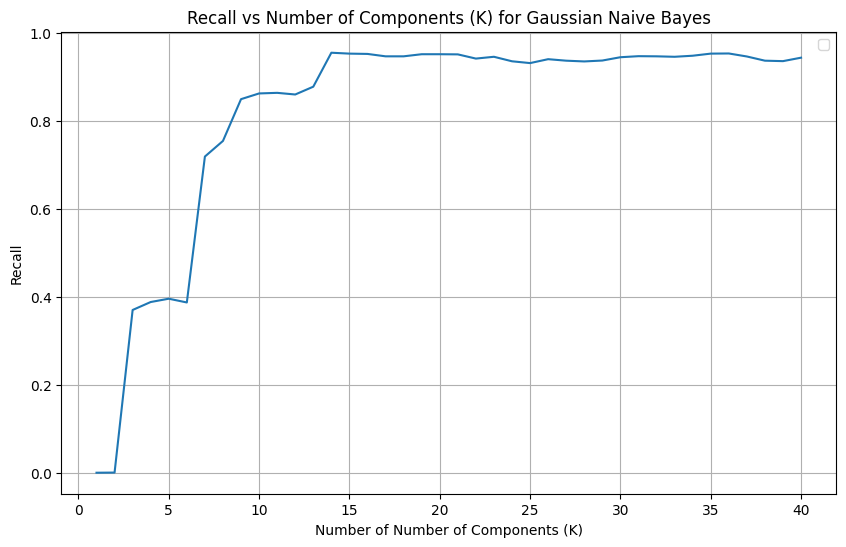

In [179]:
plt.plot(rec[:,0],rec[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Number of Components (K)')
plt.ylabel('Recall')
plt.title('Recall vs Number of Components (K) for Gaussian Naive Bayes')
plt.legend()

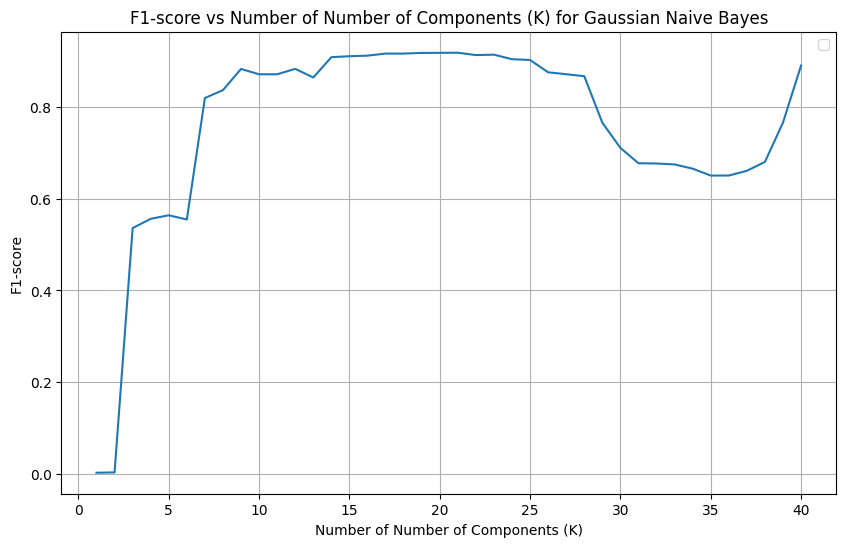

In [180]:
plt.plot(f1[:,0],f1[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Number of Components (K)')
plt.ylabel('F1-score')
plt.title('F1-score vs Number of Number of Components (K) for Gaussian Naive Bayes')
plt.legend()

In [175]:
K=21

decomposer = PCA(n_components=K)
X_r = decomposer.fit(X).transform(X)
X_train_r, X_test_r, Y_train, Y_test = train_test_split(X_r,Y, test_size=0.25, random_state = 2)
sc_X = StandardScaler()
X_train_r = sc_X.fit_transform(X_train_r)
X_test_r = sc_X.transform(X_test_r)
classifier = GaussianNB()
classifier.fit(X_train_r, Y_train)
Y_pred = classifier.predict(X_test_r)

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test,Y_pred))
print("Recall:", metrics.recall_score(Y_test,Y_pred))
print("F1-score:", metrics.f1_score(Y_test,Y_pred))

Accuracy: 0.9212448396316291
Precision: 0.8870505886096086
Recall: 0.9518607033117105
F1-score: 0.9183135704874835


Confusion matrix, without normalization
[[3014  355]
 [ 141 2788]]
Normalized confusion matrix
[[0.89462749 0.10537251]
 [0.0481393  0.9518607 ]]


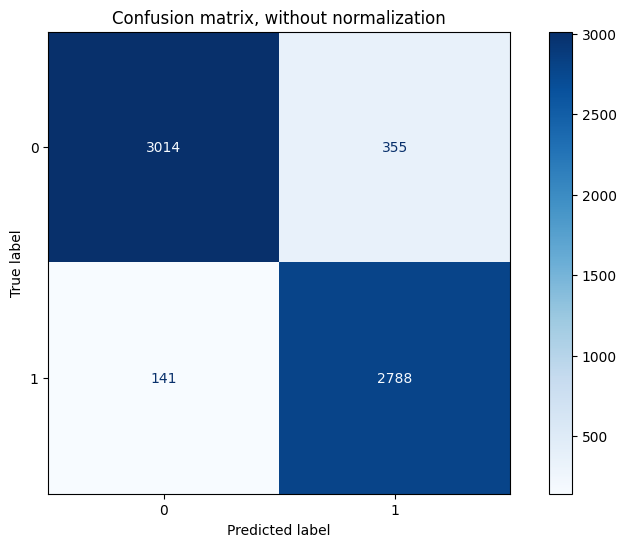

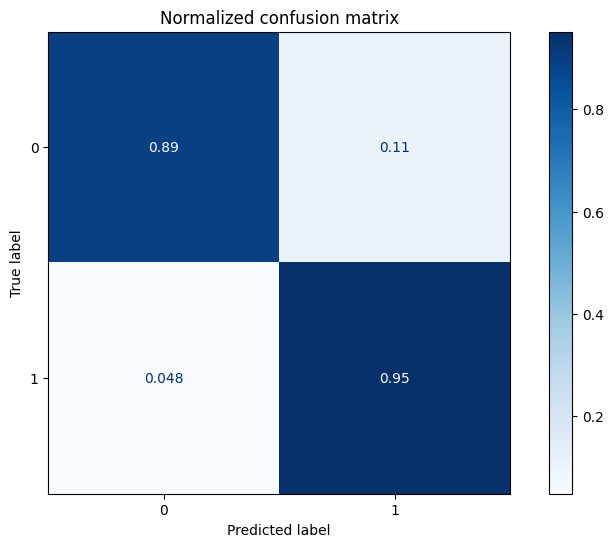

In [176]:
titles_options = [
        ("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", "true"),
    ]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test_r,
    Y_test,
    display_labels=classifier.classes_,
    cmap=plt.cm.Blues,
    normalize=normalize
  )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

### Guassion NB Without PCA

In [162]:

X_train_r, X_test_r, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state = 2)
sc_X = StandardScaler()
X_train_r = sc_X.fit_transform(X_train_r)
X_test_r = sc_X.transform(X_test_r)
classifier = GaussianNB()
classifier.fit(X_train_r, Y_train)
Y_pred = classifier.predict(X_test_r)

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test,Y_pred))
print("Recall:", metrics.recall_score(Y_test,Y_pred))
print("F1-score:", metrics.f1_score(Y_test,Y_pred))

Accuracy: 0.9102889806287711
Precision: 0.8679950186799502
Recall: 0.9518607033117105
F1-score: 0.9079954404820062


Confusion matrix, without normalization
[[2945  424]
 [ 141 2788]]
Normalized confusion matrix
[[0.87414663 0.12585337]
 [0.0481393  0.9518607 ]]


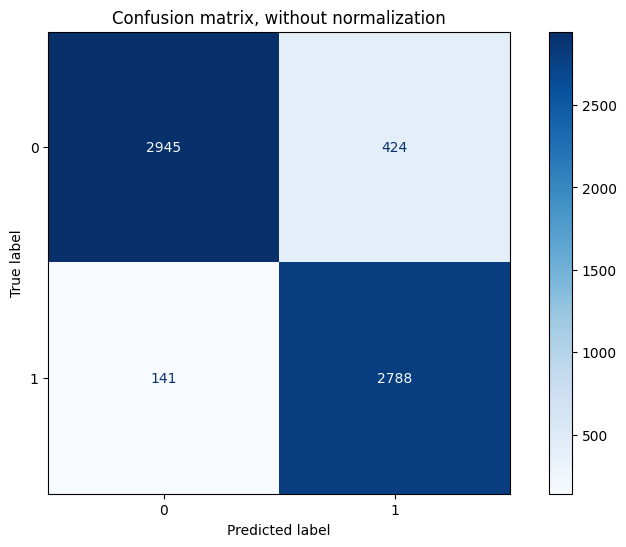

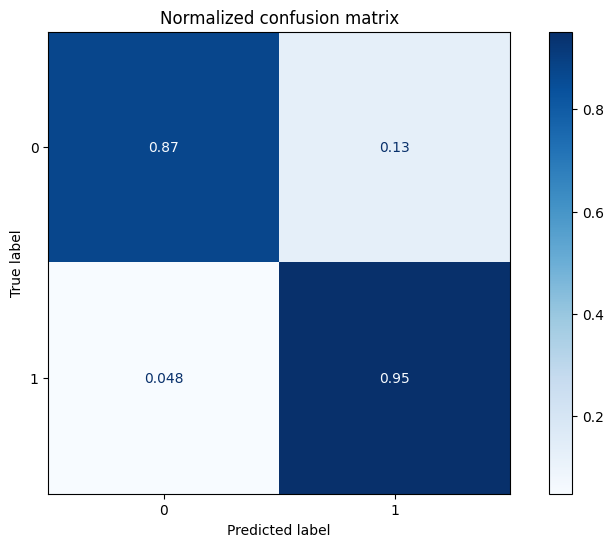

In [163]:
titles_options = [
        ("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", "true"),
    ]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test_r,
    Y_test,
    display_labels=classifier.classes_,
    cmap=plt.cm.Blues,
    normalize=normalize
  )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

In [ ]:
# plt.plot(accur[:,0],accur[:,1])
# plt.rcParams["figure.figsize"] = (10,6)
# plt.grid(1)
# plt.xlabel('Number of Components (K)')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs Number of Components (K)')
# plt.legend()

In [ ]:
# plt.plot(prec[:,0],prec[:,1])
# plt.rcParams["figure.figsize"] = (10,6)
# plt.grid(1)
# plt.xlabel('Number of Components (K)')
# plt.ylabel('Precision')
# plt.title('Precision vs Number of Components (K)')
# plt.legend()

In [ ]:
# plt.plot(rec[:,0],rec[:,1])
# plt.rcParams["figure.figsize"] = (10,6)
# plt.grid(1)
# plt.xlabel('Number of Number of Components (K)')
# plt.ylabel('Recall')
# plt.title('Recall vs Number of Components (K)')
# plt.legend()

In [ ]:
# plt.plot(f1[:,0],f1[:,1])
# plt.rcParams["figure.figsize"] = (10,6)
# plt.grid(1)
# plt.xlabel('Number of Number of Components (K)')
# plt.ylabel('F1-score')
# plt.title('F1-score vs Number of Number of Components (K)')
# plt.legend()